In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
df_osm = pd.read_csv('../../data/raw_extracted_nodes.csv', index_col=0)
df_gr = pd.read_csv('../../data/raw_extracted_relations.csv', index_col=0)

In [10]:
df_osm

,type,id,version,lat,lon,ntags,tagkey,tagvalue
0,node,15459891,8,41.319639,19.816355,0,NaN,NaN
1,node,15460178,5,41.319824,19.808143,0,NaN,NaN
2,node,15460384,5,41.319527,19.807841,0,NaN,NaN
3,node,15460447,8,41.322228,19.811221,0,NaN,NaN
4,node,15460534,7,41.322894,19.815438,0,NaN,NaN
...,...,...,...,...,...,...,...,...
559868,way,1173729375,1,NaN,NaN,5,lit,yes
559869,way,1173729375,1,NaN,NaN,5,oneway,yes
559870,way,1173729375,1,NaN,NaN,5,smoothness,good
559871,way,1173729375,1,NaN,NaN,5,surface,paving_stones


In [11]:
df_gr

,0,1,2,3,4,5,6,7,8,9,...,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168
0,3192369,4548140918,6288400375,4.548141e+09,4.647978e+09,4.647978e+09,4.548141e+09,4.391195e+09,2.879673e+09,4.548141e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3192381,4546692293,4652332034,4.652185e+09,3.837008e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3192411,3524348462,1876324813,3.524248e+09,6.288499e+09,1.549335e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3192422,15460534,4548140917,6.883615e+09,3.377274e+09,4.548141e+09,1.867591e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3192445,15493021,4652332064,1.458037e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38695,1173728336,10905559885,10905559887,1.090556e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38696,1173728337,10905559888,10905559900,1.090556e+10,1.090556e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38697,1173728338,10905559890,10905559891,1.090556e+10,1.090556e+10,1.090556e+10,1.090556e+10,1.090556e+10,1.090556e+10,1.090556e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38698,1173728339,10905559902,10905559901,1.090556e+10,1.090556e+10,1.090556e+10,1.090556e+10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
a

array([   3192369,    3192381,    3192411, ..., 1173651158, 1173651159,
       1173668649])

In [17]:
df_gr.columns = [int(x) for x in df_gr.columns]

In [18]:
a = df_osm[
    (df_osm['type'] == 'way') & 
    (df_osm['tagkey'] == 'surface') & 
    (df_osm['tagvalue'] == 'asphalt')
]['id'].values

streets = df_gr[df_gr[0].isin(a)].loc[:, :722]

street_names = df_osm[
    (df_osm['id'].isin(streets[0])) &
    (df_osm['tagkey'] == 'name')
][['id', 'tagvalue']]

streets = streets.merge(street_names, how='inner', right_on='id', left_on=0)
streets = streets.drop('id', axis=1)
streets = streets.rename(columns={'tagvalue': 'street_name'})

a = np.array(streets.iloc[:, 1:-1])
a = a[~np.isnan(a)].astype(np.int64)
a

access_lat_lon = df_osm[df_osm['id'].isin(a)][['id', 'lat', 'lon']].groupby('id').agg({
    'lat': 'first',
    'lon': 'first'
}).T.to_dict()

In [19]:
streets

,0,1,2,3,4,5,6,7,8,9,...,714,715,716,717,718,719,720,721,722,street_name
0,3192369,4548140918,6288400375,4.548141e+09,4.647978e+09,4.647978e+09,4.548141e+09,4.391195e+09,2.879673e+09,4.548141e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rruga Brigada VIII
1,3192381,4546692293,4652332034,4.652185e+09,3.837008e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rruga Emin Duraku
2,3192422,15460534,4548140917,6.883615e+09,3.377274e+09,4.548141e+09,1.867591e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rruga Vaso Pasha
3,3192445,15493021,4652332064,1.458037e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rruga Mihal Popi
4,3192446,15492898,2608865136,4.539916e+09,6.938360e+09,1.549289e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rruga Nikolla Jorga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039,1173158410,507807611,6301370253,4.592869e+09,1.090039e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rruga Dine Hoxha
4040,1173158416,10900387934,10900387931,5.078076e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rruga Dine Hoxha
4041,1173649309,1847297643,5538162796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rruga Lavdie Petrela
4042,1173651158,4681968824,6241445171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rruga Lule Borë


In [21]:
%%time

g = nx.DiGraph()

all_nodes = set()
for r in streets.itertuples():
    tmp = np.array(r)[2:-1].astype(np.cfloat)
        
    street_name = tmp[-1]
    tmp = tmp[~np.isnan(tmp)].astype(np.int64)
    
    for n in tmp:
        if n in access_lat_lon:
            data = access_lat_lon[n]
            g.add_node(n, **data)
        
    
for r in streets.itertuples():
    tmp = np.array(r)[2:-1].astype(np.double)
    street_name = tmp[-1]
    
    tmp = tmp[~np.isnan(tmp)].astype(np.int64)
        
    current = None
    for i in range(len(tmp)):
        if tmp[i] in access_lat_lon:
            current = tmp[i]
            break
    
    for j in range(1, len(tmp)):
        if tmp[j] not in access_lat_lon:
            continue 
        
        g.add_edge(current, tmp[j], name=street_name)
        current = tmp[j]
    
    all_nodes = all_nodes.union(set(tmp))
        
all_nodes = list(all_nodes)

<timed exec>:8: ComplexWarning: Casting complex values to real discards the imaginary part


CPU times: user 4.62 s, sys: 26.1 ms, total: 4.64 s
Wall time: 4.64 s


In [22]:
from crdp import rdp

ModuleNotFoundError: No module named 'crdp'

In [23]:
points[np.argmax(points[:, 1]), :]

NameError: name 'points' is not defined

In [24]:
points

NameError: name 'points' is not defined

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
clustering.labels_.max()

NameError: name 'clustering' is not defined

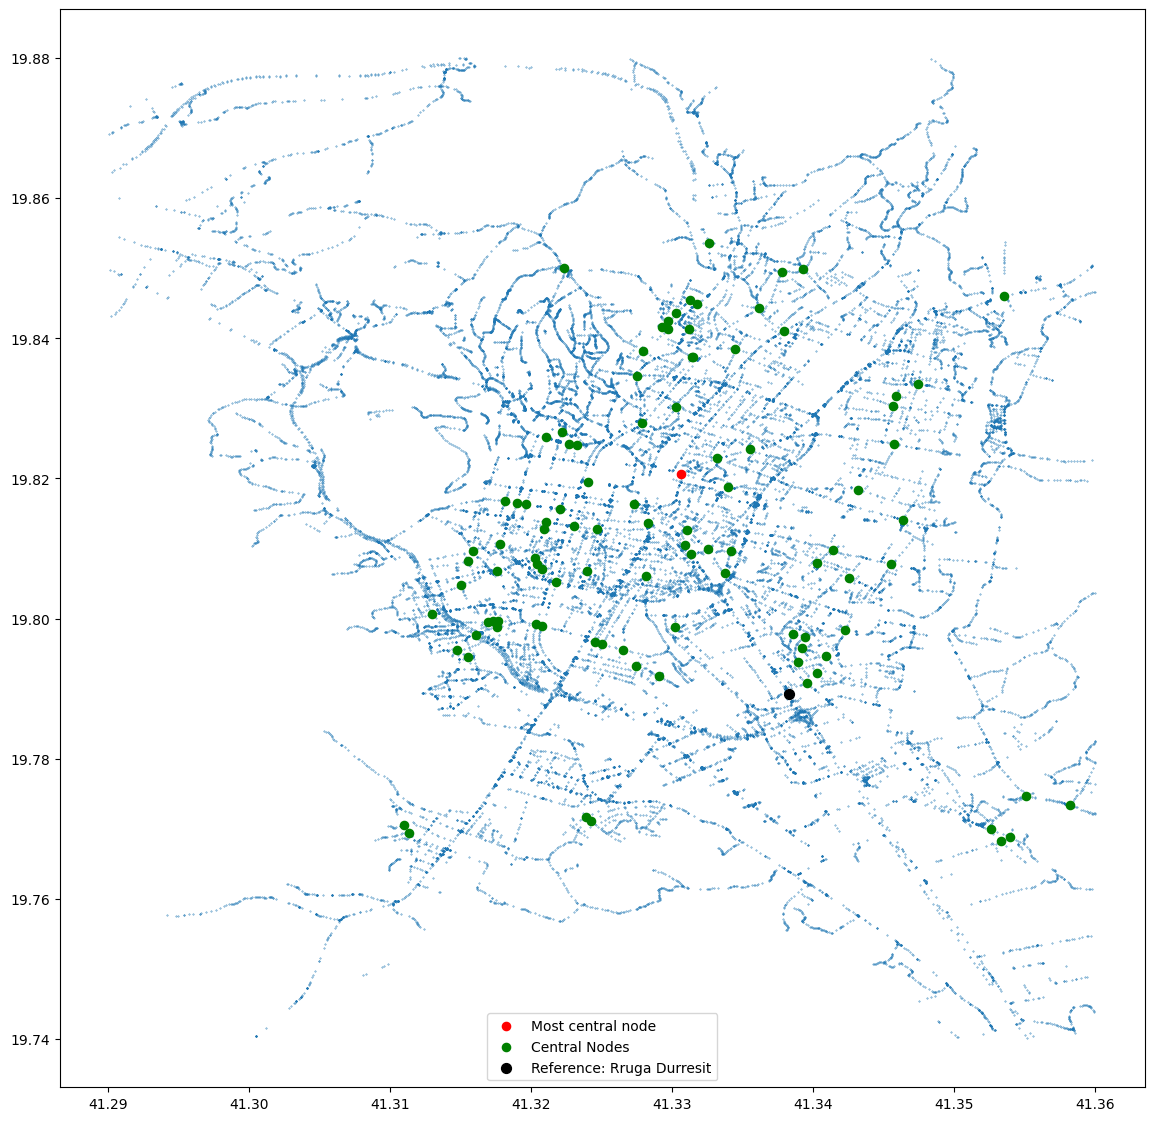

In [28]:
points = df_osm[df_osm['id'].isin(all_nodes)][['lat', 'lon']].values
plt.figure(figsize=(14, 14))

# # details at 10-30m
# points = np.array(rdp(points, 1e-4))

# shortest_path = nx.shortest_path(g, 4548140918, 6474013810)
# short_x, short_y = zip(*[(g.nodes[x]['lat'], g.nodes[x]['lon']) for x in shortest_path])

take_k = 100
most_central_nodes = sorted([(a, b) for a, b in nx.degree_centrality(g).items()], key=lambda x: x[1], reverse=True)[:take_k]
cent_x, cent_y = zip(*[(g.nodes[x]['lat'], g.nodes[x]['lon']) for x, _ in most_central_nodes])


# clustering = DBSCAN(eps=9e-4, min_samples=40).fit(points)
# print(clustering.labels_.max())
# for l in range(clustering.labels_.max()):
#     idx = np.where(clustering.labels_ == l)
#     plt.scatter(points[idx, 0], points[idx, 1], s=0.1)


plt.scatter(points[:, 0], points[:, 1], s=0.1)
# plt.scatter(short_x, short_y, s=10, c='red', label='Shortest path')
plt.scatter(cent_x[0], cent_y[0], s=35, c='red', label='Most central node')
plt.scatter(cent_x[1:], cent_y[1:], s=35, c='green', label='Central Nodes')
plt.scatter([41.338294], [19.789223], s=50, c='black', label='Reference: Rruga Durresit')
plt.legend()

## Explorative

In [ ]:
# list all different tags and their corresponding nodes
# data = {
#     'name': [],
#     'len': []
# }

# for test_tag in df_osm.sort_values('tagkey')['tagkey'].unique():
#     tmp = df_osm[
#         (df_osm['type'] == 'node') & 
#         (
#             (df_osm['tagkey'] == test_tag)
#         )
#     ]
    
#     data['name'].append(test_tag)
#     data['len'].append(len(tmp))
    
    
# filtering_df = pd.DataFrame(data)
# filtering_df.sort_values('len', ascending=False, inplace=True)

In [ ]:
# filtering_df.to_csv('use_to_filter_df.csv')

In [ ]:
# filtering_df = pd.read_csv('use_to_filter_df.csv', index_col=0)

# filtering_df = filtering_df[
#     (filtering_df['len'] > 0) & 
#     (~filtering_df['name'].isin([
#         'natural', 'leaf_cycle', 'leaf_type',
#         'genus', 'trees', 'species'
#     ]))
# ]

# for t in filtering_df.itertuples():
#     print(f"{t.name} ({t.len})")

In [16]:
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'noname') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

,type,id,version,lat,lon,ntags,tagkey,tagvalue
107732,node,4631474192,2,41.323456,19.81999,3,noname,yes


In [17]:
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'target') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')['tagvalue'].unique()

array(['AL'], dtype=object)

In [60]:
df_osm[
    (df_osm['id'] == 3192445)
]

,type,id,version,lat,lon,ntags,tagkey,tagvalue
335274,way,3192445,11,NaN,NaN,8,name,Rruga Mihal Popi
335275,way,3192445,11,NaN,NaN,8,note,To the new/remote mappers: please refer to the...
335276,way,3192445,11,NaN,NaN,8,oneway,yes
335277,way,3192445,11,NaN,NaN,8,source,bing;mapbox;digitalglobe-satellite
335278,way,3192445,11,NaN,NaN,8,highway,living_street
335279,way,3192445,11,NaN,NaN,8,surface,asphalt
335280,way,3192445,11,NaN,NaN,8,smoothness,good
335281,way,3192445,11,NaN,NaN,8,source_ref:url,https://www.flickr.com/photos/openstreetmap-al...
335282,way,3192445,11,NaN,NaN,0,None,None


In [ ]:
df_osm[df_osm['type'] == 'way']

In [ ]:
# https://github.com/Mapkin/osmgraph
# read to parse the appropriate graph

## Further explore nodes
Explore these nodes more to get an idea of places of interest in Tirana

In [18]:
# population nodes
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'population') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

,type,id,version,lat,lon,ntags,tagkey,tagvalue
6224,node,1835254686,46,41.326873,19.818791,87,population,557422
245607,node,6313760898,4,41.326907,19.851001,10,population,51871
245618,node,6313760899,4,41.314023,19.834097,10,population,82972
245629,node,6313760900,4,41.341505,19.846528,10,population,45174
245640,node,6313760901,4,41.351506,19.841494,10,population,65357
245651,node,6313760902,4,41.317222,19.797849,10,population,86997
245662,node,6313760903,4,41.316684,19.772754,10,population,74923
245673,node,6313760904,4,41.328296,19.793395,10,population,74950
245684,node,6313760905,6,41.345886,19.824040,10,population,41670
245695,node,6313760906,4,41.340516,19.809815,10,population,64014


In [19]:
# relegious objects of warship
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'denomination') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id').head(50)

df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'religion') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

,type,id,version,lat,lon,ntags,tagkey,tagvalue
36084,node,3841898597,2,41.326745,19.827925,7,religion,muslim
43921,node,4191510487,3,41.326228,19.816974,6,religion,christian
45149,node,4338657603,3,41.305696,19.806098,5,religion,muslim
68365,node,4558593166,1,41.310295,19.769230,5,religion,muslim
88878,node,4594472127,1,41.300594,19.847405,2,religion,muslim
103545,node,4621152728,1,41.326279,19.843444,3,religion,muslim
156371,node,4779462433,1,41.326316,19.808270,4,religion,christian
159975,node,5070046221,2,41.342732,19.835826,5,religion,christian
198099,node,5312347737,1,41.313970,19.819229,4,religion,christian
214089,node,5758936724,4,41.320787,19.854416,6,religion,muslim


In [ ]:
# bus stops
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'bus') 
    )
].sort_values('id')

In [ ]:
# interesting objects
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'man_made') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

In [ ]:
# healthcare, dentist, pharmacy (not hospitals, it includes them but dont take it)
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'healthcare') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

In [ ]:
# find all the different type of shops
df_osm[
    (df_osm['tagkey'] == 'shop') & (df_osm['type'] == 'node')
]

In [ ]:
# find all the different type of government offices
df_osm[
    (df_osm['tagkey'] == 'office') & (df_osm['type'] == 'node')
]

In [ ]:
# find all the different type of private businesses
df_osm[
    (df_osm['tagkey'] == 'amenity') & (df_osm['type'] == 'node')
]

In [ ]:
# tourism points
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'tourism') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')


# historical places
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'historic') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'memorial') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

In [ ]:
# if it has description (not many descriptions (less than 50))
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'description') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id').head(50)

In [ ]:
# find all the different type of small private businesses, or small govermental public spaces (tagvalue school) 
df_osm[
    (df_osm['tagkey'] == 'amenity') & (df_osm['type'] == 'node')
]['tagvalue'].unique()

In [ ]:
# find all the different type of private businesses
df_osm[
    (df_osm['tagkey'] == 'amenity') & (df_osm['type'] == 'node') & (df_osm['tagvalue']  == 'stripclub')
]

In [ ]:
# find all hospitals
df_osm[
    (df_osm['tagkey'] == 'amenity') & (df_osm['type'] == 'node') & (df_osm['tagvalue']  == 'hospital')
]

In [ ]:
# all bars with outdor seeting
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'outdoor_seating') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

In [ ]:
# all known atm
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'atm') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

In [ ]:
# all zebra crossings
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'crossing') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id').head(50)

In [ ]:
# all tactile paving 
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'tactile_paving') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

In [ ]:
# power towers in tirana
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'power') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

In [ ]:
# heliopads
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'aeroway') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

In [ ]:
# elevation in different parts of tirana
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'ele') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id').head(50)

In [ ]:
# can find stadiums with tagvalue = stadium
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'leisure') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

In [ ]:
# some sort of barrier
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'barrier') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

In [ ]:
# large business or government offices
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'operator') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')['tagvalue'].unique()

In [ ]:
# public emails
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'email') 
    )
].sort_values('id')['tagvalue'].unique()

In [ ]:
# bicycle roads
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'bicycle') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

In [ ]:
# known brands
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'brand:wikipedia') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')['tagvalue'].unique()

In [ ]:
# parkings
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'parking') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

In [ ]:
# diplomatic 
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'diplomatic') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'country') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'embassy') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

In [ ]:
# not understood (what is forward)
df_osm[
    (df_osm['type'] == 'node') & 
    (
        (df_osm['tagkey'] == 'direction') #| (df_osm['tagkey'] == 'name')
    )
].sort_values('id')

In [ ]:
unique_coords = df_osm[['lat', 'lon', 'type']].groupby(['lat', 'lon']).count().reset_index()
unique_coords

In [ ]:
(len(unique_coords)/len(df_osm)) * 100

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(unique_coords['type'], 20)